**Objective:** This project aims to Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Importing the file and looking at the sample data
df = pd.read_csv("/content/bank11.csv")
df.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3263,35,management,married,tertiary,no,24,yes,no,cellular,8,apr,169,1,231,2,failure,no
4157,55,retired,married,secondary,no,159,no,no,cellular,28,aug,159,1,-1,0,unknown,no
4353,30,admin.,married,tertiary,no,400,yes,no,cellular,7,may,223,1,-1,0,unknown,no
4140,54,self-employed,divorced,primary,no,4382,yes,no,telephone,18,may,193,4,-1,0,unknown,no
3411,57,management,married,tertiary,no,0,no,no,cellular,19,aug,188,4,-1,0,unknown,no
4286,39,admin.,married,tertiary,no,722,no,no,telephone,23,apr,141,1,-1,0,unknown,no
3520,32,management,single,tertiary,no,347,yes,no,cellular,18,may,213,1,264,6,failure,no


In [25]:
#Statistical Summary of the dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [26]:
df.isnull().sum()
#dataset has no null values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [27]:
df.info()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


(4521, 17)

<Axes: xlabel='previous', ylabel='Count'>

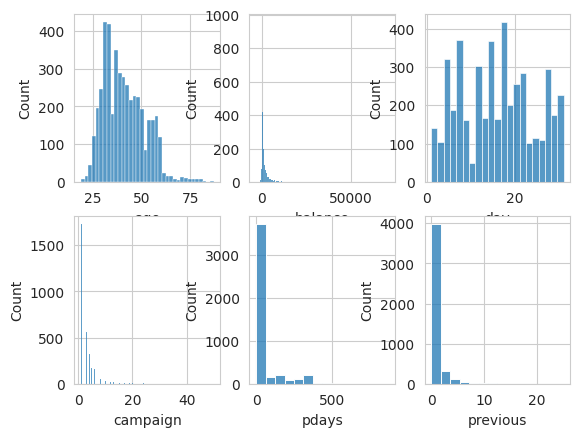

In [28]:
fig,axes = plt.subplots(2,3)
sns.histplot(data = df, x ='age', ax = axes[0,0])
sns.histplot(data = df, x ='balance', ax = axes[0,1])
sns.histplot(data = df, x ='day', ax = axes[0,2])
sns.histplot(data = df, x ='campaign', ax = axes[1,0])
sns.histplot(data = df, x ='pdays', ax = axes[1,1])
sns.histplot(data = df, x ='previous', ax = axes[1,2])

<Axes: xlabel='previous'>

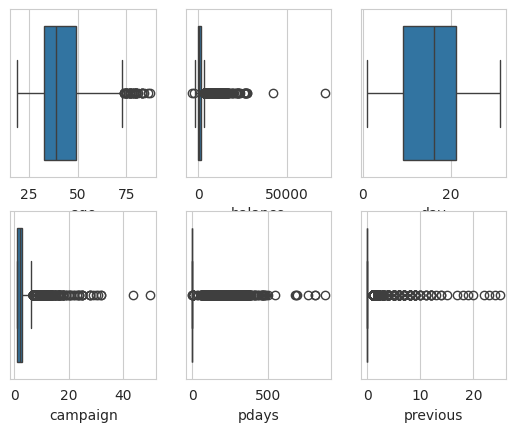

In [29]:
fig,axes = plt.subplots(2,3)
sns.boxplot(data = df, x ='age', ax = axes[0,0])
sns.boxplot(data = df, x ='balance', ax = axes[0,1])
sns.boxplot(data = df, x ='day', ax = axes[0,2])
sns.boxplot(data = df, x ='campaign', ax = axes[1,0])
sns.boxplot(data = df, x ='pdays', ax = axes[1,1])
sns.boxplot(data = df, x ='previous', ax = axes[1,2])

In [30]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

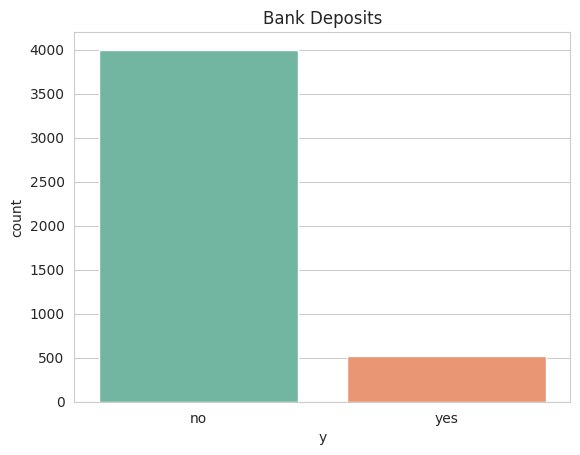

In [34]:
x1 = sns.countplot(x = 'y', data = df, palette='Set2')
plt.title('Bank Deposits')
plt.show()

Bank deposit products  or service subscribed by 521 people out of 4521 people.

Bank deposit products  or service not subscribed by 4000 people out of 4521 people.

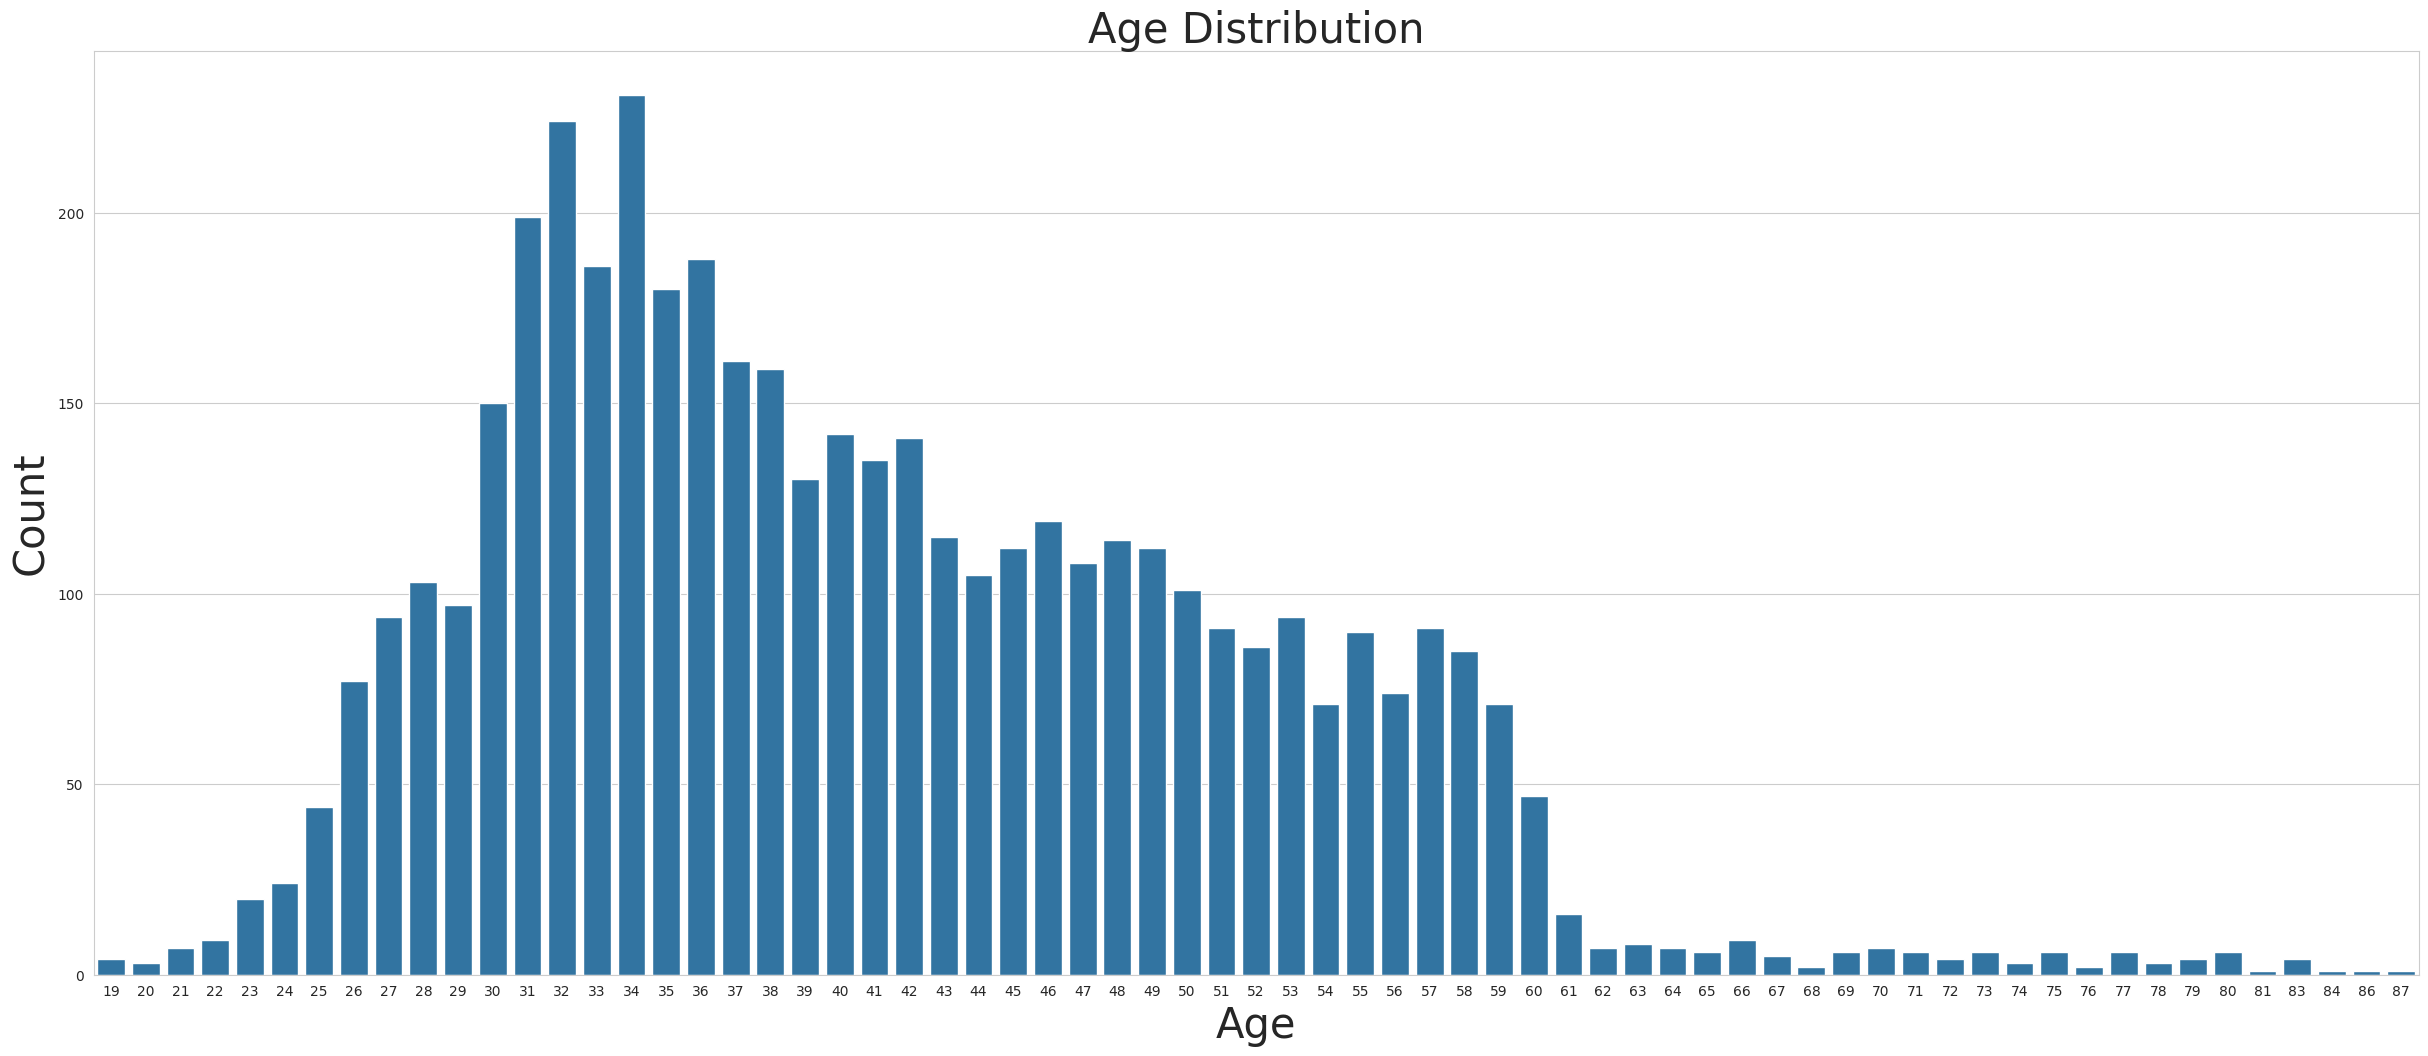

In [40]:
plt.figure(figsize = (30,12))
sns.countplot(x ='age', data = df)
plt.title('Age Distribution',fontsize = 30)
plt.xlabel('Age',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
plt.show()

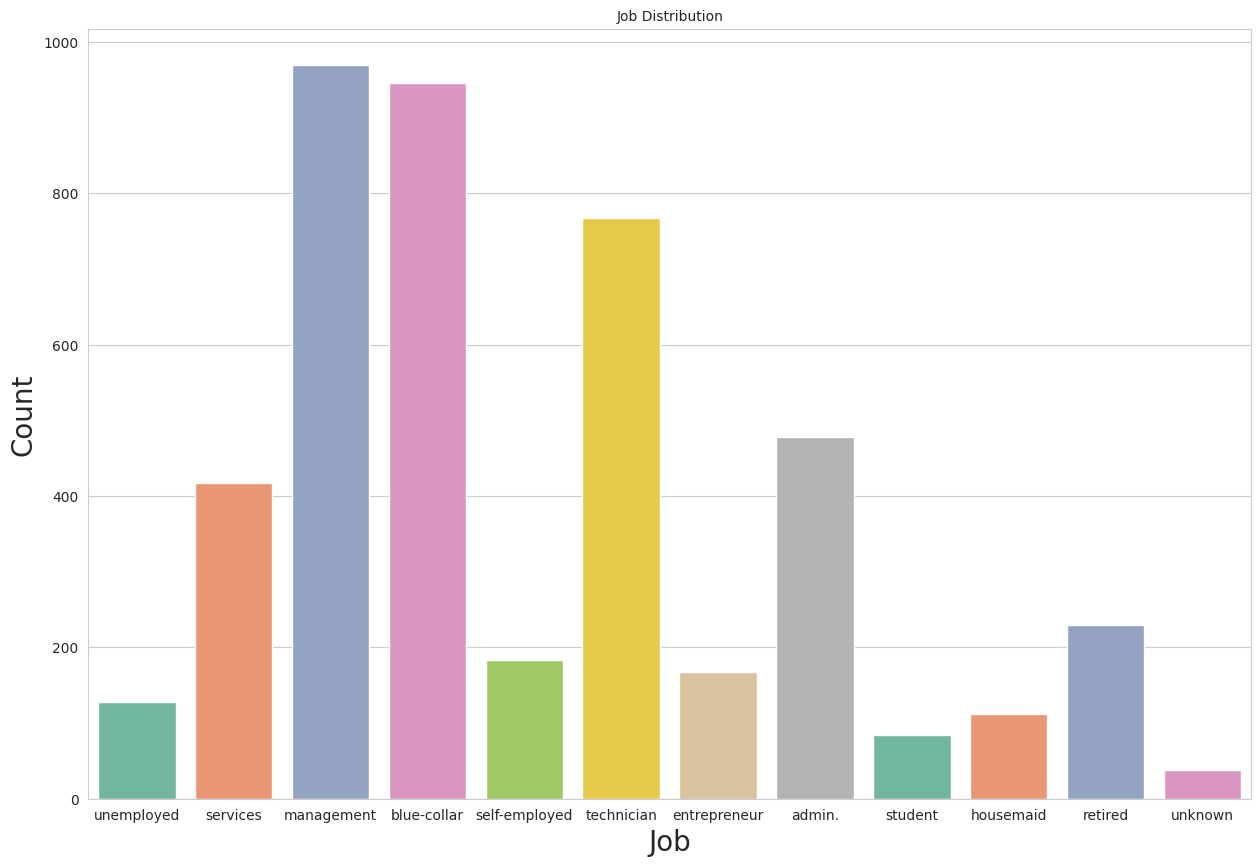

In [67]:
plt.figure(figsize = (15,10))
sns.countplot(x ='job', data = df, palette="Set2")
plt.title('Job Distribution',fontsize = 10)
plt.xlabel('Job',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

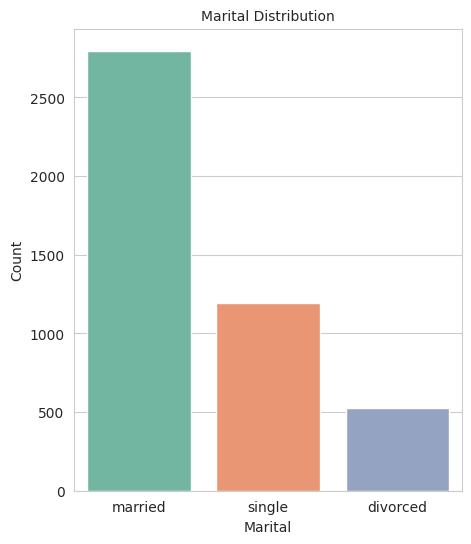

In [52]:
plt.figure(figsize = (5,6))
sns.countplot(x ='marital', data = df, palette='Set2')
plt.title('Marital Distribution',fontsize = 10)
plt.xlabel('Marital',fontsize = 10)
plt.ylabel('Count',fontsize =10)
plt.show()

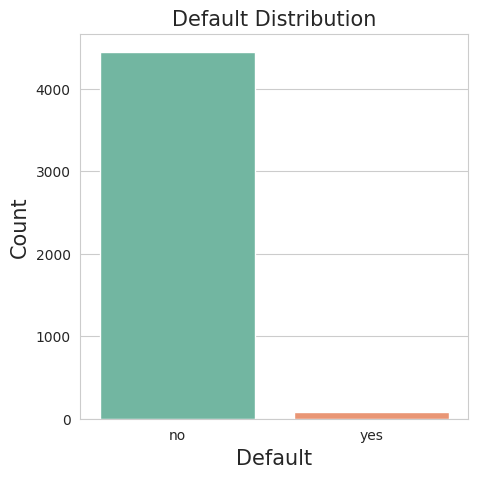

In [55]:
plt.figure(figsize = (5,5))
sns.countplot(x ='default', data = df, palette= "Set2")
plt.title('Default Distribution',fontsize = 15)
plt.xlabel('Default',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

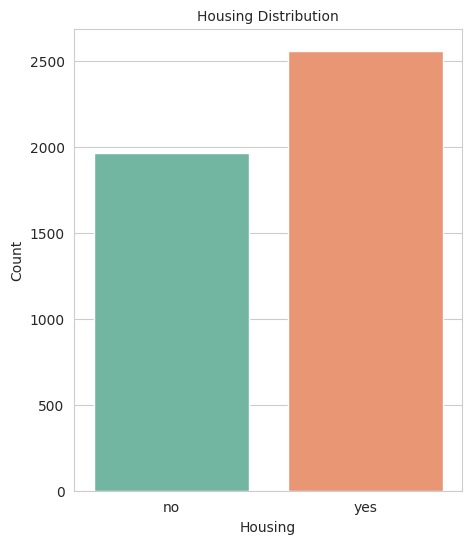

In [57]:
plt.figure(figsize = (5,6))
sns.countplot(x ='housing', data = df,palette= "Set2")
plt.title('Housing Distribution',fontsize = 10)
plt.xlabel('Housing',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.show()

In [58]:
print('Housing:\n No Housing:' , df[df['housing']=='no'] ['age'].count(),
 '\n Yes Housing:' , df[df['housing']=='yes'] ['age'].count())


Housing:
 No Housing: 1962 
 Yes Housing: 2559


The clients having housing loan is 597 more then clients who did not opted for housing loan.

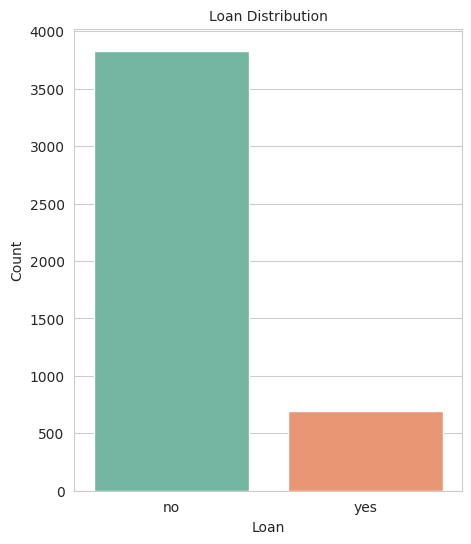

In [59]:
plt.figure(figsize = (5,6))
sns.countplot(x ='loan', data = df, palette = 'Set2')
plt.title('Loan Distribution',fontsize = 10)
plt.xlabel('Loan',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.show()

In [60]:
print('Loan:\n No Personal Loan:' , df[df['loan']=='no'] ['age'].count(),
 '\n Yes Personal Loan:' , df[df['loan']=='yes'] ['age'].count())

Loan:
 No Personal Loan: 3830 
 Yes Personal Loan: 691


The clients having personal loan is 3139 less then clients who did not opted for personal loan.

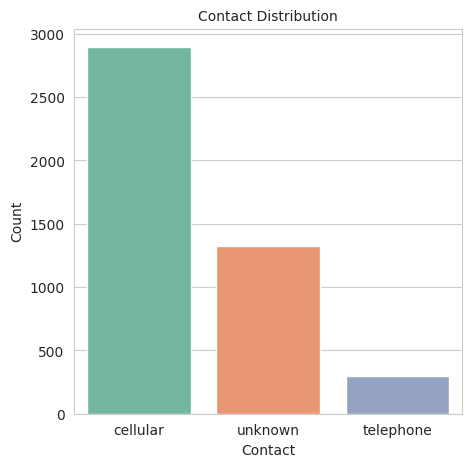

In [62]:
plt.figure(figsize = (5,5))
sns.countplot(x ='contact', data = df, palette ='Set2')
plt.title('Contact Distribution',fontsize = 10)
plt.xlabel('Contact',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.show()

The number of customers who has mobile phones are more easily accessible for a connect
than other categories

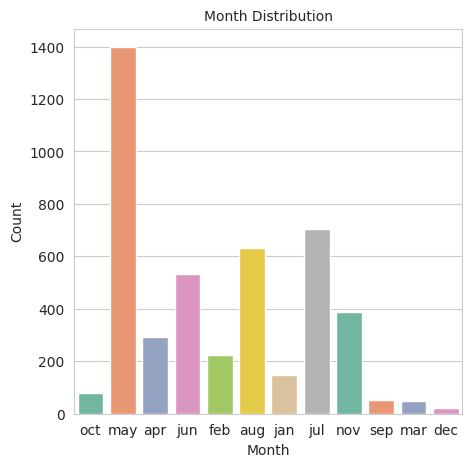

In [64]:
plt.figure(figsize = (5,5))
sns.countplot(x ='month', data = df, palette = 'Set2')
plt.title('Month Distribution',fontsize = 10)
plt.xlabel('Month',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.show()

Highest number of contacts to customers is in the month of May.

**Conclusion**:

1. Number of outliers in the age column is less.
2. In customers, most of them are married.
3. Blue-collar jobs is most common in customers, Management jobs can also be noticed.
4. Most of the clients have passed secondary education.
5. Number of customers having by-default credit is less.
6. The clients having housing loan is 597 more then clients who did not opted for housing
loan.
7. The clients having personal loan is 3139 less then clients who did not opted for personal
loan.
8. The number of customers who has mobile phones are more easily accessible for a connect
than other categories.
9. Highest number of contacts to customers is in the month of May.
10. Bank deposit products subscribed by 421 people out of 4521 people.
11. Bank deposit products not subscribed by 4000 people out of 4521 people
12. Highest number of customers of the bank is in their 30's.